## **Máquinas de Vectores de Soporte (Support Vector Machines, SVM)**
Prof. Marcos Alania

## **1. Introducción a las SVM**
Las **Máquinas de Vectores de Soporte** (SVM) son un tipo de algoritmo de aprendizaje supervisado utilizado principalmente para resolver problemas de clasificación binaria, aunque también puede aplicarse a problemas de regresión. Las SVM se destacan por buscar la mejor separación entre clases mediante la construcción de un **hiperplano óptimo** en un espacio de características de alta dimensión. La idea clave detrás de las SVM es maximizar el **margen** entre las clases, es decir, la distancia más cercana entre los puntos de datos de cada clase y el hiperplano separador.

## **2. Concepto Básico: Hiperplanos y Márgenes**
En el caso de un problema de clasificación binaria con dos clases, los datos de entrada consisten en pares $(𝑥_𝑖,𝑦_𝑖)$, donde $𝑥_𝑖$ es el vector de características de un punto de datos y $𝑦_𝑖 ∈ \{−1,1\}$ es la etiqueta de clase asociada (1 para una clase y -1 para la otra).

### **2.1. Hiperplano de Separación**
Un **hiperplano** es una frontera lineal que separa dos clases en un espacio de características. En un espacio bidimensional (2D), este hiperplano es una línea, y en un espacio tridimensional (3D), es un plano. En general, en un espacio de dimensión $d$, un hiperplano se define mediante la ecuación:

\begin{equation}
    w \cdot x + b = 0
\end{equation}

Donde:

*  $w$ es un vector de pesos que define la dirección del hiperplano,
*  $x$ es el vector de características del punto de datos,
*  $b$ es un sesgo o término de desplazamiento (bias),
*  $⋅$ denota el producto punto entre vectores.

### **2.2. Margen**
El margen es la distancia más corta entre el hiperplano y los puntos de datos más cercanos de cada clase. Las SVM buscan encontrar el hiperplano que **maximiza este margen**, ya que un mayor margen proporciona una mejor capacidad de generalización, lo que reduce el riesgo de sobreajuste.

### **2.3. Vectores de Soporte**
Los **vectores de soporte** son los puntos de datos más cercanos al hiperplano y son fundamentales para definir la posición del hiperplano óptimo. Estos puntos son los únicos que afectan la construcción del hiperplano, mientras que otros puntos de datos que se encuentran más alejados no influyen en su posición. En términos simples, los vectores de soporte son los puntos "críticos" que determinan la frontera de decisión.


## **3. Máxima Separación y Formulación del Problema**
El objetivo de una SVM es encontrar el hiperplano que maximiza el margen. Este problema puede formularse matemáticamente como un **problema de optimización cuadrática**.

### **3.1. Condiciones de Separación**
Para que los puntos se clasifiquen correctamente, necesitamos que los datos de ambas clases estén en lados opuestos del hiperplano. Las siguientes condiciones deben cumplirse para todos los puntos de datos:

\begin{equation}
    y_i (w \cdot x_i + b) \geq 1 \quad \text{para todos los } i
\end{equation}

Esta desigualdad significa que:
*  Si $y_i = 1$ (la clase positiva), entonces $w \cdot x_i + b \geq 1$
*  Si $y_i = -1$ (la clase negativa), entonces $w \cdot x_i + b \leq -1$

En resumen, estas condiciones aseguran que los puntos de datos estén en el lado correcto del margen definido por el hiperplano.

### **3.2. Maximización del Margen**
El margen entre los puntos de cada clase y el hiperplano es proporcional a $\frac{2}{\|w\|}$, donde $\|w\|$ es la norma del vector $w$. Por lo tanto, maximizar el margen es equivalente a **minimizar** $\|w\|^2$.

Por tanto, el problema de optimización para encontrar el hiperplano óptimo se puede formular como:

\begin{equation}
\min_{w, b} \frac{1}{2} \|w\|^2
\end{equation}

Sujeto a las restricciones de separación:
\begin{equation}
    y_i (w \cdot x_i + b) \geq 1 \quad \text{para todos los } i
\end{equation}

Este es un problema de optimización cuadrática con restricciones lineales, que puede resolverse utilizando técnicas de optimización como los **multiplicadores de Lagrange**.

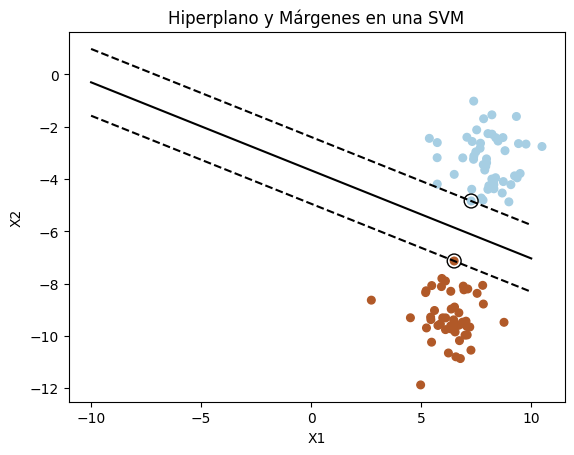

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Crear un conjunto de datos de ejemplo
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Crear y entrenar una SVM lineal
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Obtener los coeficientes del hiperplano
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Calcular el margen
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Graficar los puntos de datos y el hiperplano
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Destacar los vectores de soporte
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Hiperplano y Márgenes en una SVM')
plt.show()


### **Explicación del Código**
1.  **Importación de Bibliotecas**: Importamos `numpy` para cálculos numéricos, `matplotlib` para visualización y `sklearn` para la implementación de la SVM.

2.  **Creación de Datos**: Usamos `make_blobs` para generar un conjunto de datos con dos clases.

3.  **Entrenamiento del Modelo**: Creamos y entrenamos una SVM lineal con un kernel lineal.

4.  **Cálculo del Hiperplano**: Obtenemos los coeficientes del hiperplano $w$ y calculamos la línea que lo representa.

5.  **Cálculo de Márgenes**: Calculamos las líneas que representan los márgenes superior e inferior del hiperplano.

6.  **Visualización**: Graficamos los puntos de datos, el hiperplano y los márgenes. Destacamos los vectores de soporte.

### **Resultados**
Al ejecutar este código, obtendrás una visualización del hiperplano que maximiza el margen y los márgenes de la SVM. Esto demuestra cómo la SVM resuelve el problema de optimización cuadrática para encontrar el hiperplano óptimo.

Espero que disfrutes explorando este ejemplo en Google Colab. ¿Te gustaría profundizar en algún aspecto específico?

## **4. Formulación de los Multiplicadores de Lagrange**

Para resolver el problema de optimización con restricciones, se utiliza la técnica de los **multiplicadores de Lagrange**. Se define una función Lagrangiana $L(w, b, \alpha)$, donde
$\alpha_i$ son los multiplicadores de Lagrange asociados con las restricciones $y_i (w \cdot x_i + b) \geq 1$

La función Lagrangiana es:

\begin{equation}
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^n \alpha_i [y_i (w \cdot x_i + b) - 1]
\end{equation}

El objetivo es minimizar $L(w, b, \alpha)$ con respecto a $w$ y  $b$ y maximizar con respecto a $\alpha_i$, sujeto a la restricción $\alpha_i \geq 0$.

### **Ejemplo**
Ejemplo de optimización cuadrática con restricciones lineales utilizando multiplicadores de Lagrange.

Supongamos que queremos minimizar la función cuadrática: $[ f(x, y) = x^2 + y^2 ]$

Sujeto a la restricción lineal: $[ g(x, y) = x + y - 1 = 0 ]$

In [5]:
import numpy as np
import scipy.optimize as opt

# Definir la función objetivo
def func(x):
    return x[0]**2 + x[1]**2

# Definir la restricción
def constraint(x):
    return x[0] + x[1] - 1

# Punto inicial
x0 = [0, 0]

# Definir la restricción en el formato requerido por scipy.optimize
cons = {'type': 'eq', 'fun': constraint}

# Resolver el problema de optimización utilizando minimize con el método SLSQP
result = opt.minimize(func, x0, method='SLSQP', constraints=cons)

# Mostrar los resultados
print(f'Solución encontrada: x = {result.x[0]}, y = {result.x[1]}')
print(f'Valor mínimo de la función objetivo: {result.fun}')


Solución encontrada: x = 0.5000000000000001, y = 0.4999999999999999
Valor mínimo de la función objetivo: 0.5


### **Explicación del Código:**
1.  **Importación de Bibliotecas**: Importamos `numpy` para cálculos numéricos y `scipy.optimize` para la optimización.

2.  **Definición de la Función Objetivo**: Definimos la función cuadrática $f(x, y) = x^2 + y^2$ que queremos minimizar.

3.  **Definición de la Restricción**: Definimos la restricción lineal $g(x, y) = x + y - 1 = 0$.

4.  **Punto Inicial**: Establecemos un punto inicial para el algoritmo de optimización.

5.  **Definición de la Restricción para Scipy**: Formateamos la restricción para que `scipy.optimize` pueda manejarla.

6.  **Optimización**: Usamos la función `minimize` de `scipy.optimize` con el método SLSQP (Sequential Least Squares Quadratic Programming) para resolver el problema.

7.  **Resultados**: Imprimimos la solución encontrada y el valor mínimo de la función objetivo.

Este ejemplo muestra cómo resolver un problema de optimización cuadrática con una restricción lineal utilizando multiplicadores de Lagrange en Python.


## **5. Solución del Problema Dual**
El problema de optimización anterior puede reescribirse como un **problema dual**, que es más fácil de resolver computacionalmente. La versión dual se convierte en:

\begin{equation}
\max_{\alpha} \left( \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) \right)
\end{equation}

Sujeto a las restricciones:
\begin{equation}
\sum_{i=1}^n \alpha_i y_i = 0
\end{equation}

\begin{equation}
    \alpha_i \geq 0 \quad \text{para todos los } i
\end{equation}

El resultado de la optimización nos da los valores óptimos de
$\alpha_i$, que permiten calcular el vector $w$ como:
\begin{equation}
w = \sum_{i=1}^n \alpha_i y_i x_i
\end{equation}

Finalmente, el **hiperplano óptimo** se determina utilizando los vectores de soporte, es decir, aquellos puntos para los que $\alpha_i \geq 0$.

### **Ejemplo**

Vamos a resolver un problema de optimización cuadrática con restricciones lineales utilizando tanto la forma primal como la dual. Luego, compararemos los dos métodos.

### **Problema Primal**
Supongamos que queremos minimizar la función cuadrática: $ \min_{x} \frac{1}{2} x^T Q x + c^T x$

Sujeto a la restricción lineal: $ Ax = b $

### **Problema Dual**
El problema dual equivalente es: $\max_{\alpha} \left( -\frac{1}{2} \alpha^T A Q^{-1} A^T \alpha + \alpha^T b \right)$

### **Código en Python**

In [6]:
import numpy as np
import scipy.optimize as opt

# Definir los parámetros del problema
Q = np.array([[2, 0], [0, 2]])  # Matriz simétrica positiva definida
c = np.array([1, 1])  # Vector de coeficientes lineales
A = np.array([[1, 1]])  # Matriz de restricciones
b = np.array([1])  # Vector de restricciones

# Resolver el problema primal usando scipy.optimize.minimize
def primal_objective(x):
    return 0.5 * np.dot(x.T, np.dot(Q, x)) + np.dot(c, x)

primal_constraints = {'type': 'eq', 'fun': lambda x: np.dot(A, x) - b}

x0 = np.zeros(2)  # Punto inicial

primal_solution = opt.minimize(primal_objective, x0, constraints=primal_constraints)
primal_x = primal_solution.x
primal_value = primal_solution.fun

print(f'Solución primal: x = {primal_x}')
print(f'Valor mínimo de la función objetivo primal: {primal_value}')

# Resolver el problema dual usando scipy.optimize.minimize
def dual_objective(alpha):
    AQ_inv = np.dot(A, np.linalg.inv(Q))
    return -0.5 * np.dot(alpha.T, np.dot(AQ_inv, A.T @ alpha)) + np.dot(alpha, b)

dual_solution = opt.minimize(lambda alpha: dual_objective(alpha), np.zeros(1))
dual_alpha = dual_solution.x
dual_value = -dual_solution.fun

print(f'Solución dual: α = {dual_alpha}')
print(f'Valor máximo de la función objetivo dual: {dual_value}')


Solución primal: x = [0.5 0.5]
Valor mínimo de la función objetivo primal: 1.4999999999999998
Solución dual: α = [-1023.99999237]
Valor máximo de la función objetivo dual: 525311.9921798706


### **Explicación del Código**
1.  **Definición de Parámetros:** Definimos la matriz $Q$, el vector $c$, la matriz de restricciones $A$ y el vector de restricciones $b$.

2.  **Problema Primal:**

  *  **Función Objetivo Primal**: Definimos la función objetivo cuadrática $\min_{x} \frac{1}{2} x^T Q x + c^T x$.

  *  **Restricciones Primal**: Definimos las restricciones lineales $ Ax = b $.

  *  **Solución Primal**: `Usamos scipy.optimize.minimize` para resolver el problema primal.

3.  **Problema Dual**:

  *  Función Objetivo Dual: Definimos la función objetivo dual $\max_{\alpha} \left( -\frac{1}{2} \alpha^T A Q^{-1} A^T \alpha + \alpha^T b \right)$.

  *  Solución Dual: Usamos `scipy.optimize.minimize` para resolver el problema dual.

4.  **Comparación de Resultados**: Imprimimos las soluciones y los valores óptimos de las funciones objetivo primal y dual.


## **6. Caso de Separabilidad No Lineal: El Truco del Kernel**
Las SVM lineales solo funcionan bien si los datos son linealmente separables. Sin embargo, en la práctica, muchos problemas no son lineales, lo que significa que los datos no se pueden separar mediante un hiperplano lineal en el espacio de entrada. Para resolver esto, se utiliza el **truco del kernel**.

### **6.1. Concepto del Kernel**
La idea es mapear los datos de entrada a un espacio de características de mayor dimensión donde los datos sean linealmente separables. Sin embargo, en lugar de calcular explícitamente esta transformación, se utiliza un **kernel**, que es una función que mide la similitud entre los puntos de datos en este espacio de características de alta dimensión.

Algunos de los kernels más comunes son:
*  **Kernel lineal**: $K(x_i, x_j) = x_i \cdot x_j$
*  **Kernel polinómico**: $K(x_i, x_j) = (x_i \cdot x_j + 1)^d$
*  **Kernel RBF (Radial Basis Function)**: $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$

### **6.2. SVM No Lineales**
Cuando se utiliza un kernel, el hiperplano de separación se construye en un espacio de características de mayor dimensión, pero las operaciones se realizan directamente sobre los datos en el espacio original mediante el kernel. El problema dual en la SVM con kernel es el mismo que en el caso lineal, pero en lugar de utilizar el producto punto $x_i \cdot x_j$, se utiliza el kernel $K(x_i, x_j)$.

### **Ejemplo**

Ejemplo que demuestra cómo las SVM no lineales pueden manejar casos de separabilidad no lineal utilizando diferentes tipos de kernels: Kernel lineal, Kernel polinómico y Kernel RBF (Radial Basis Function).




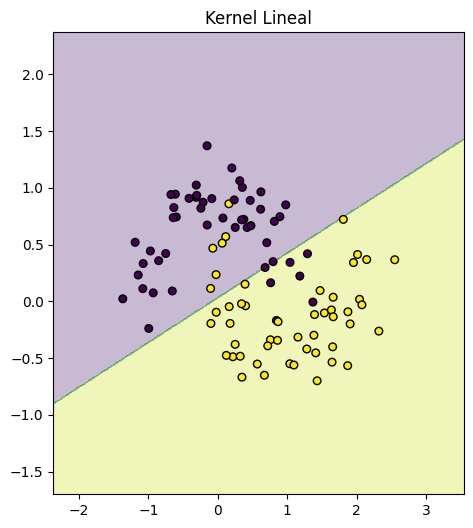

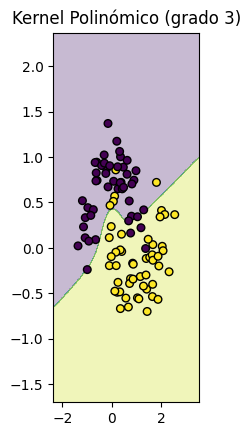

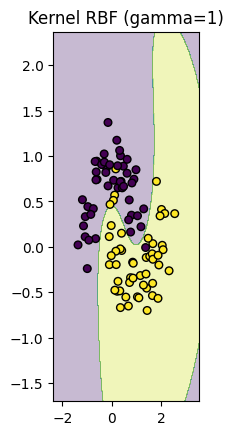

<Figure size 640x480 with 0 Axes>

In [7]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Crear un conjunto de datos de ejemplo con no linealidad
X, y = datasets.make_moons(n_samples=100, noise=0.2, random_state=42)

# Definir y entrenar los clasificadores SVM con diferentes kernels
svm_linear = SVC(kernel='linear').fit(X, y)
svm_poly = SVC(kernel='poly', degree=3).fit(X, y)
svm_rbf = SVC(kernel='rbf', gamma=1).fit(X, y)

# Función para trazar los márgenes de decisión
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    plt.title(title)
    plt.show()

# Trazar los márgenes de decisión para cada kernel
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_decision_boundaries(X, y, svm_linear, 'Kernel Lineal')

plt.subplot(1, 3, 2)
plot_decision_boundaries(X, y, svm_poly, 'Kernel Polinómico (grado 3)')

plt.subplot(1, 3, 3)
plot_decision_boundaries(X, y, svm_rbf, 'Kernel RBF (gamma=1)')

plt.tight_layout()
plt.show()


### **Explicación del Código**
1.  **Importación de Bibliotecas**: Importamos `numpy` para cálculos numéricos, `matplotlib` para visualización y `sklearn` para la implementación de las SVM.

2.  **Creación de Datos**: Utilizamos `make_moons` para generar un conjunto de datos de dos clases con una estructura no lineal.

3.  **Definición y Entrenamiento de Clasificadores SVM**:

  *  **Kernel Lineal**: Un hiperplano lineal para la separación.

  *  **Kernel Polinómico**: Un kernel polinómico de grado 3 para manejar la no linealidad.

  *  **Kernel RBF**: Un kernel RBF que utiliza funciones de base radial para capturar la no linealidad.

4.  **Función de Trazado de Márgenes de Decisión**: Creamos una función para trazar los márgenes de decisión de los clasificadores SVM.

5.  **Visualización**: Graficamos los márgenes de decisión para cada kernel en un subplot separado.

### **Resultados**
Al ejecutar este código, obtendrás visualizaciones que muestran cómo cada kernel maneja la separabilidad no lineal en el conjunto de datos. Este ejemplo ilustra cómo el "truco del kernel" permite a las SVM abordar problemas de clasificación no lineal.

## **7. SVM con Violaciones del Margen: SVM Suaves (Soft Margin)**
En la práctica, puede que los datos no sean perfectamente separables, incluso en un espacio de características de mayor dimensión. Para manejar este problema, se introducen las **SVM de margen suave (soft margin)**, que permiten que algunos puntos de datos estén en el lado incorrecto del margen o incluso del hiperplano.

Se introducen variables de holgura $ξ_i$ para permitir estas violaciones, y el problema de optimización se modifica de la siguiente manera:
\begin{equation}
\min_{w, b, \xi} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i \right)
\end{equation}


Sujeto a las restricciones:
\begin{equation}
y_i (w \cdot x_i + b) \geq 1 - \xi_i \\
\xi_i \geq 0
\end{equation}


Donde $C$ es un parámetro que controla el equilibrio entre maximizar el margen y minimizar las violaciones del margen. Un valor alto de $C$ da lugar a una penalización mayor para las violaciones, lo que reduce el número de errores de clasificación pero puede resultar en un sobreajuste.


### **Ejemplo**
ejemplo de SVM con violaciones del margen, también conocidas como SVM Suaves (Soft Margin SVM). Este enfoque permite que algunos puntos violen el margen, lo cual es útil en escenarios donde los datos no son perfectamente separables.

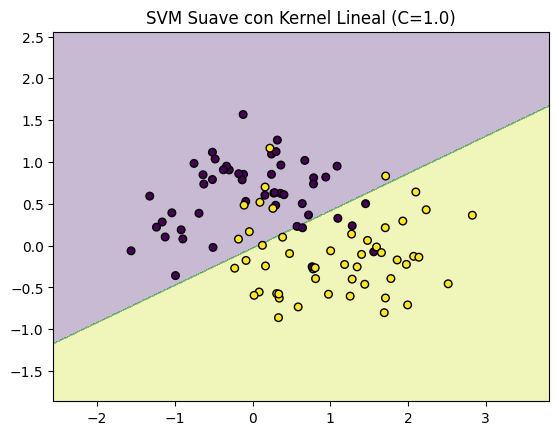

In [8]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Crear un conjunto de datos de ejemplo con no linealidad
X, y = datasets.make_moons(n_samples=100, noise=0.3, random_state=42)

# Definir y entrenar una SVM Suave (Soft Margin SVM)
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X, y)

# Función para trazar los márgenes de decisión
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    plt.title(title)
    plt.show()

# Trazar los márgenes de decisión para la SVM Suave
plot_decision_boundaries(X, y, svm_soft, 'SVM Suave con Kernel Lineal (C=1.0)')


### **Explicación del Código**
1.  **Importación de Bibliotecas**: Importamos `numpy` para cálculos numéricos, `matplotlib` para visualización y `sklearn` para la implementación de la SVM.

2.  **Creación de Datos**: Utilizamos `make_moons` para generar un conjunto de datos de dos clases con una estructura no lineal.

3.  **Definición y Entrenamiento de la SVM Suave**:

  *  **Kernel Lineal**: Usamos un kernel lineal con un parámetro $C$  de 1.0 para permitir violaciones del margen.

4.  **Función de Trazado de Márgenes de Decisión**: Creamos una función para trazar los márgenes de decisión del clasificador SVM.

5.  **Visualización**: Graficamos los márgenes de decisión para la SVM Suave.

### **Resultados**
Al ejecutar este código, obtendrás una visualización que muestra cómo la SVM Suave maneja las violaciones del margen en el conjunto de datos. Este ejemplo ilustra cómo el parámetro $C$ permite ajustar el balance entre maximizar el margen y permitir ciertas violaciones del margen.

## **8. Conclusión**

Las Máquinas de Vectores de Soporte (SVM) son una técnica poderosa para la clasificación y regresión. La clave de las SVM es encontrar el hiperplano que maximice el margen entre las clases, lo que mejora la capacidad de generalización del modelo. En problemas donde los datos no son linealmente separables, el uso de kernels permite encontrar una solución efectiva en un espacio de características de mayor dimensión. Las SVM también pueden manejar casos en los que los datos no son perfectamente separables mediante la introducción de márgenes suaves.